<a href="https://colab.research.google.com/github/dsp0011/DAT250LAB2/blob/master/DAT255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [1]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# Imports

In [2]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Selected features

In [7]:
# These are the final fetures that were selected during the feature selection process
features_from_feature_importance = [
                                    "met_et",
                                    "lep_1_E",
                                    "lep_2_E",
                                    "lep_3_E",
                                    "lep_1_eta",
                                    "lep_2_eta",
                                    "jet_n",
                                    "lep_1_pt",
                                    "lep_2_pt",
                                    "lep_3_pt",
                                    "lep_4_pt",
                                    "lep_5_pt",
                                    "lep_1_phi",
                                    "lep_2_phi",
                                    "jet_2_trueflav",
                                    "jet_1_E",
                                    "jet_3_E",
                                    "jet_1_pt",
                                    "jet_2_pt",
                                    "jet_3_pt",
                                    "jet_4_pt",
                                    "jet_5_pt",
                                    "jet_6_pt",
                                    "jet_7_pt",
                                    "jet_8_pt",
                                    "jet_9_pt",
                                    "alljet_n",
                                    "lep_1_etcone20",
                                    "jet_2_MV1",
                                    "jet_1_MV1",
                                    "jet_1_phi",
                                    "jet_1_m",
                                    "jet_2_E",
                                    "jet_2_jvf",
                                    "jet_1_SV0",
                                    ]
eventWeights = [

                ]



# Use this if extracting features won't work from the following cell

# eventWeights = [
#                 'mcWeight',
#                 'scaleFactor_BTAG',
#                 'scaleFactor_ELE',
#                 'scaleFactor_JVFSF',
#                 'scaleFactor_MUON',
#                 'scaleFactor_PILEUP',
#                 'scaleFactor_TRIGGER',
#                 'scaleFactor_ZVERTEX'
#                 ]



In [8]:
#Function that was used to get the weight features, must be commented out  with the reduced dataset

path = 'drive/MyDrive/DAT255 Dovydas/'
signal     = pd.read_hdf(path + 'mc_110899.ZPrime400.hdf5', 'mini')

# signal     = pd.read_pickle(reduced_path  + 'signal.pkl') # use these two lines instead when using the reduced data set
# signal     = signal.loc[:,~signal.columns.duplicated()]   # use these two lines instead when using the reduced data set

feature_list = list(signal)

for feature in feature_list:
  if "SCALE" in feature.upper() or "WEIGHT" in feature.upper():
    eventWeights.append(feature)

In [9]:
# These features are meta-information and should therefore not be used in the model trianing

# black_list = ["TRUTHMATCHED", "SCALEFACTOR", "WEIGHT", "NUMBER"]
# features = [feature for feature in feature_list if not any(substring in feature.upper() for substring in black_list)]


In [10]:
# Features used for initial testing

# features_to_remove_containing = ["_3", "_4", "_5", "_6", "_7", "_8", "_9"]
# features_reduced = [feature for feature in features if not any(substring in feature.upper() for substring in features_to_remove_containing)]


# Invariant mass

This part calculates the mass of the particles, which is an interesting property to look at. However, it is mot particularly important for the learner itself. It has been calculated using the following formula under ["Collider experiments"](https://en.wikipedia.org/wiki/Invariant_mass).

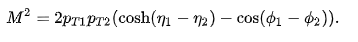

It will, however, not make much sense with the reduced dataset, hence the code was kept for the original data files.

In [8]:
jet_pt_list = [feature for feature in feature_list if all(substring in feature.upper() for substring in ["PT", "JET"])]
lep_pt_list = [feature for feature in feature_list if all(substring in feature.upper() and "CONE30" not in feature.upper() for substring in ["PT", "LEP"])]

jet_pseudorapidity_list = [feature for feature in feature_list if all(substring in feature.upper() for substring in ["ETA", "JET"])]
lep_pseudorapidity_list = [feature for feature in feature_list if all(substring in feature.upper() and "CONE30" not in feature.upper() for substring in ["ETA", "LEP"])]

jet_phi_list = [feature for feature in feature_list if all(substring in feature.upper() for substring in ["PHI", "JET"])]
lep_phi_list = [feature for feature in feature_list if all(substring in feature.upper() and "CONE30" not in feature.upper() for substring in ["PHI", "LEP"])]

invariant_features = lep_pt_list[:2] + lep_phi_list[:2] + lep_pseudorapidity_list[:2]


In [9]:
signal_name_list = [
               'mc_110901.ZPrime500.hdf5',
               'mc_110902.ZPrime750.hdf5',
               'mc_110903.ZPrime1000.hdf5',
               'mc_110905.ZPrime1500.hdf5',
               'mc_110906.ZPrime1750.hdf5',
               'mc_110907.ZPrime2000.hdf5',
               'mc_110908.ZPrime2250.hdf5',
               'mc_110909.ZPrime2500.hdf5',
               'mc_110910.ZPrime3000.hdf5',
]
signal = pd.read_hdf(path + 'mc_110899.ZPrime400.hdf5', 'mini')[invariant_features]
for signal_name in signal_name_list:
  new_signal = pd.read_hdf(path + signal_name, 'mini')[invariant_features]
  signal = signal.append(new_signal, ignore_index=True)


In [10]:
import math
# signal['jet_1_pt'] * signal['jet_2_pt'] * (math.cosh(signal['jet_1_eta'] - signal['jet_2_eta']) - math.cosh(signal['jet_1_phi'] - signal['jet_2_phi']))
signal['invariant_mass'] = np.sqrt(2 * (signal['lep_1_pt'] * signal['lep_2_pt']) * (np.cosh(signal['lep_1_eta'] - signal['lep_2_eta']) - np.cos(signal['lep_1_phi'] - signal['lep_2_phi'])))

In [11]:
def calc_invariant_mass(lep_1_pt, lep_2_pt, lep_1_eta, lep_2_eta, lep_1_phi, lep_2_phi):
  return math.sqrt(2 * lep_1_pt * lep_2_pt * (math.cosh(lep_1_eta - lep_2_eta) - math.cos(lep_1_phi - lep_2_phi)))

In [12]:
signal[1:2][lep_pt_list[:2] + lep_phi_list[:2] + lep_pseudorapidity_list[:2] + ['invariant_mass']]  

,lep_1_pt,lep_2_pt,lep_1_phi,lep_2_phi,lep_1_eta,lep_2_eta,invariant_mass
1,52924.1875,10713.722656,0.206479,-1.893656,0.808597,-1.572424,82206.273438


In [13]:
#Quick test that the invariant mass has been calculated correctly 
invairant_mass_test = calc_invariant_mass(
    signal[1:2]['lep_1_pt'],
    signal[1:2]['lep_2_pt'],
    signal[1:2]['lep_1_eta'],
    signal[1:2]['lep_2_eta'],
    signal[1:2]['lep_1_phi'],
    signal[1:2]['lep_2_phi'],
)
invairant_mass_test

82206.27168288318

In [16]:
signal['invariant_mass'].mean()

148941.5

In [17]:
signal['invariant_mass'].max()

4261299.5

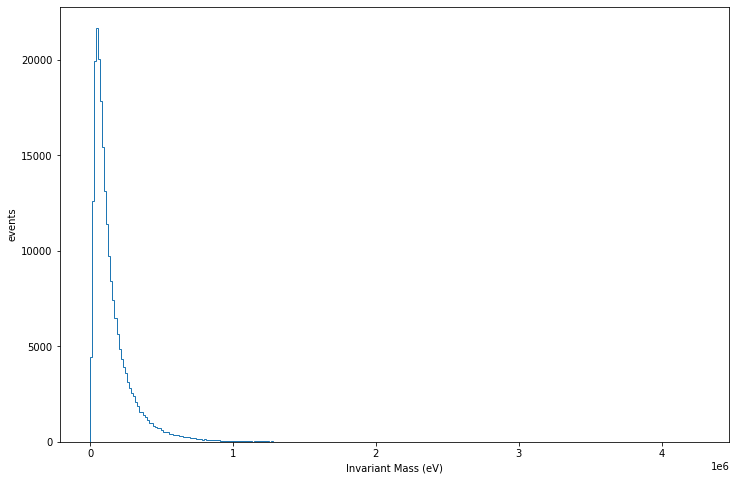

In [18]:
plt.figure(figsize=(12,8))
plt.xlabel('Invariant Mass (eV)')
plt.ylabel('events')
plt.hist(signal['invariant_mass'], bins=300, histtype="step")
print("")

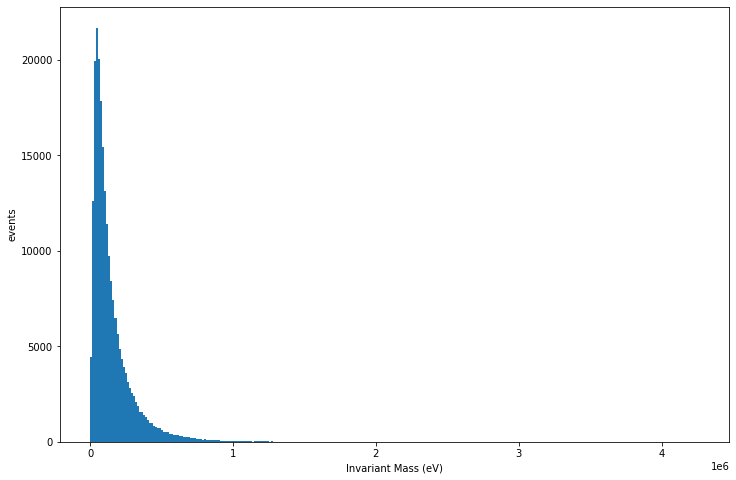

In [19]:
plt.figure(figsize=(12,8))
plt.xlabel('Invariant Mass (eV)')
plt.ylabel('events')
plt.hist(signal['invariant_mass'], bins=300)
print("")

# Getting the data

In [11]:
##A helper function to get ram usage

import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)


In [12]:
features_reduced = features_from_feature_importance

In [13]:
signal_name_list = [
               'mc_110901.ZPrime500.hdf5',
               'mc_110902.ZPrime750.hdf5',
               'mc_110903.ZPrime1000.hdf5',
               'mc_110905.ZPrime1500.hdf5',
               'mc_110906.ZPrime1750.hdf5',
               'mc_110907.ZPrime2000.hdf5',
               'mc_110908.ZPrime2250.hdf5',
               'mc_110909.ZPrime2500.hdf5',
               'mc_110910.ZPrime3000.hdf5',
]

In [14]:
features_and_weights = features_from_feature_importance
features_and_weights += eventWeights
path = 'drive/MyDrive/DAT255 Dovydas/'


diboson     = pd.read_hdf(path+'diboson.hdf5','mini')[features_and_weights]
DYee     = pd.read_hdf(path+'DYee.hdf5','mini')[features_and_weights]
DYmumu     = pd.read_hdf( path + 'DYmumu.hdf5', 'mini')[features_and_weights]
DYtautau    = pd.read_hdf( path + 'DYtautau.hdf5', 'mini')[features_and_weights]
ttbar_lep     = pd.read_hdf( path + 'ttbar_lep.hdf5', 'mini')[features_and_weights]
Wenu     = pd.read_hdf( path + 'Wenu.hdf5.hdf5', 'mini')[features_and_weights]
Wmunu     = pd.read_hdf( path + 'Wmunu.hdf5', 'mini')[features_and_weights]
Wtaunu     = pd.read_hdf( path + 'Wtaunu.hdf5', 'mini')[features_and_weights]
Zee     = pd.read_hdf( path + 'Zee.hdf5', 'mini', stop=2812500)[features_and_weights]
## total rows of Zee: 5625000, have been reduced in half due to RAM issues

ttbar_had     = pd.read_hdf( path + 'ttbar_had.hdf5', 'mini')[features_and_weights]
Ztautau     = pd.read_hdf( path + 'Ztautau.hdf5', 'mini')[features_and_weights]
# signal     = pd.read_hdf(path + 'mc_110909.ZPrime2500.hdf5', 'mini')[features_and_weights] used for single signal data testing

In [15]:
signal = pd.read_hdf(path + 'mc_110899.ZPrime400.hdf5', 'mini')[features_and_weights]
for signal_name in signal_name_list:
  new_signal = pd.read_hdf(path + signal_name, 'mini')[features_and_weights]
  signal = signal.append(new_signal, ignore_index=True)


In [16]:
import psutil
def get_ram():
  return psutil.virtual_memory().available * 100 / psutil.virtual_memory().total
get_ram()

70.56490273559514

In [17]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           Zee: 482.8 MiB
                     ttbar_lep: 193.1 MiB
                        DYmumu: 160.9 MiB
                          DYee: 148.1 MiB
                       diboson: 144.8 MiB
                          Wenu: 96.6 MiB
                         Wmunu: 96.6 MiB
                       Ztautau: 96.6 MiB
                        signal: 37.1 MiB
                        Wtaunu: 12.9 MiB


In [18]:
diboson = shuffle(diboson, random_state = 42)
DYee = shuffle(DYee, random_state = 42)
DYmumu = shuffle(DYmumu, random_state = 42)
DYtautau = shuffle(DYtautau, random_state = 42)
ttbar_lep = shuffle(ttbar_lep, random_state = 42)
Wenu = shuffle(Wenu, random_state = 42)
Wmunu = shuffle(Wmunu, random_state = 42)
Wtaunu = shuffle(Wtaunu, random_state = 42)
Zee = shuffle(Zee, random_state = 42)
ttbar_had = shuffle(ttbar_had, random_state = 42)
Ztautau = shuffle(Ztautau, random_state = 42)

signal = shuffle(signal, random_state = 42)



In [19]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           Zee: 482.8 MiB
                     ttbar_lep: 193.1 MiB
                        DYmumu: 160.9 MiB
                          DYee: 148.1 MiB
                       diboson: 144.8 MiB
                          Wenu: 96.6 MiB
                         Wmunu: 96.6 MiB
                       Ztautau: 96.6 MiB
                        signal: 38.8 MiB
                        Wtaunu: 12.9 MiB


In [20]:
get_ram()

92.42314426043413

In [21]:

background = [diboson, DYee, DYmumu, DYtautau, ttbar_lep, Wenu, Wmunu, Wtaunu, Zee, ttbar_had, Ztautau]
backgroundLabel = ['diboson', 'DYee', 'DYmumu', 'DYtautau', 'ttbar_lep', 'Wenu', 'Wmunu', 'Wtaunu', 'Zee', 'ttbar_had', 'Ztautau']


In [22]:
for i in range(0, len(background)):
  print(backgroundLabel[i] + ": " + str(background[i]['mcWeight'].mean()))

diboson: 1.0
DYee: 1.0
DYmumu: 1.0
DYtautau: 1.0
ttbar_lep: 1.0
Wenu: 0.28095051646232605
Wmunu: 0.28425493836402893
Wtaunu: 0.255444198846817
Zee: 2276981.0
ttbar_had: 1.0
Ztautau: 1736514.5


In [23]:
store_path = 'drive/MyDrive/Dat255 reduced files'
  

# Exporting data subset

In [27]:
background_columns_map = {}

for i in range(0, len(background)):
  background_columns_map[backgroundLabel[i]] = background[i].shape[0]

background_columns_map

{'DYee': 862500,
 'DYmumu': 937500,
 'DYtautau': 31789,
 'Wenu': 562500,
 'Wmunu': 562500,
 'Wtaunu': 75000,
 'Zee': 2812500,
 'Ztautau': 562500,
 'diboson': 843750,
 'ttbar_had': 18877,
 'ttbar_lep': 1125000}

In [35]:
reduced_background_columns_map = {}

store_path = 'drive/MyDrive/Dat255 reduced files'
for i in range(0, len(background)):
  df = background[i].sample(frac = 0.1, random_state = 1, replace = False)
  reduced_background_columns_map[backgroundLabel[i]] = df.shape[0]
  df.to_pickle(store_path + "/" + backgroundLabel[i] + ".pkl")


reduced_background_columns_map


{'DYee': 86250,
 'DYmumu': 93750,
 'DYtautau': 3179,
 'Wenu': 56250,
 'Wmunu': 56250,
 'Wtaunu': 7500,
 'Zee': 281250,
 'Ztautau': 56250,
 'diboson': 84375,
 'ttbar_had': 1888,
 'ttbar_lep': 112500}

In [37]:

df_signal = signal.sample(frac = 0.1, random_state = 1, replace = False)
df_signal.to_pickle(store_path + "/signal.pkl")
df_signal.shape[0]

22600

# Reading the reduced data

In [ ]:
##helper function to get ram usage

import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)


In [67]:

features_and_weights = features_from_feature_importance
features_and_weights += eventWeights

In [68]:
reduced_path = 'drive/MyDrive/Dat255 reduced files/'


diboson     = pd.read_pickle(reduced_path +'diboson.pkl')
DYee     = pd.read_pickle(reduced_path +'DYee.pkl')
DYmumu     = pd.read_pickle( reduced_path  + 'DYmumu.pkl')
DYtautau    = pd.read_pickle( reduced_path  + 'DYtautau.pkl')
ttbar_lep     = pd.read_pickle( reduced_path  + 'ttbar_lep.pkl')
Wenu     = pd.read_pickle( reduced_path  + 'Wenu.pkl')
Wmunu     = pd.read_pickle( reduced_path  + 'Wmunu.pkl')
Wtaunu     = pd.read_pickle( reduced_path  + 'Wtaunu.pkl')
Zee     = pd.read_pickle( reduced_path  + 'Zee.pkl')
ttbar_had     = pd.read_pickle( reduced_path  + 'ttbar_had.pkl')
Ztautau     = pd.read_pickle( reduced_path  + 'Ztautau.pkl')

signal     = pd.read_pickle(reduced_path  + 'signal.pkl')



In [69]:
# Due to some issues with conversion to .pkl, some of the columns have been duplicated.
# The following code solves the issue

diboson     = diboson.loc[:,~diboson.columns.duplicated()]
DYee        = DYee.loc[:,~DYee.columns.duplicated()]
DYmumu      = DYmumu.loc[:,~DYmumu.columns.duplicated()]
DYtautau    = DYtautau.loc[:,~DYtautau.columns.duplicated()]
ttbar_lep   = ttbar_lep.loc[:,~ttbar_lep.columns.duplicated()]
Wenu        = Wenu.loc[:,~Wenu.columns.duplicated()]
Wmunu       = Wmunu.loc[:,~Wmunu.columns.duplicated()]
Wtaunu      = Wtaunu.loc[:,~Wtaunu.columns.duplicated()]
Zee         = Zee.loc[:,~Zee.columns.duplicated()]
ttbar_had   = ttbar_had.loc[:,~ttbar_had.columns.duplicated()]
Ztautau     = Ztautau.loc[:,~Ztautau.columns.duplicated()]
signal      = signal.loc[:,~signal.columns.duplicated()]

In [70]:
diboson = shuffle(diboson, random_state = 42)
DYee = shuffle(DYee, random_state = 42)
DYmumu = shuffle(DYmumu, random_state = 42)
DYtautau = shuffle(DYtautau, random_state = 42)
ttbar_lep = shuffle(ttbar_lep, random_state = 42)
Wenu = shuffle(Wenu, random_state = 42)
Wmunu = shuffle(Wmunu, random_state = 42)
Wtaunu = shuffle(Wtaunu, random_state = 42)
Zee = shuffle(Zee, random_state = 42)
ttbar_had = shuffle(ttbar_had, random_state = 42)
Ztautau = shuffle(Ztautau, random_state = 42)

signal = shuffle(signal, random_state = 42)


In [71]:

background = [diboson, DYee, DYmumu, DYtautau, ttbar_lep, Wenu, Wmunu, Wtaunu, Zee, ttbar_had, Ztautau]
backgroundLabel = ['diboson', 'DYee', 'DYmumu', 'DYtautau', 'ttbar_lep', 'Wenu', 'Wmunu', 'Wtaunu', 'Zee', 'ttbar_had', 'Ztautau']

# NN

## Import Fast AI

In [31]:
!pip install fastai==2.2.7


     |████████████████████████████████| 194kB 4.0MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 12.8MB 341kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [32]:
!pip install -Uqq fastbook 
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 3.9MB/s 
     |████████████████████████████████| 1.2MB 7.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 


ModuleNotFoundError: ignored

In [25]:
from fastai import *
from fastai.vision import *
from fastai.tabular.all import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Train NN


In [26]:
import gc

In [27]:
del Zee
del ttbar_lep
del DYmumu
del DYee
del diboson
del Wenu
del Ztautau
gc.collect()

132

In [28]:
features = features_from_feature_importance

In [29]:
# Adding the dependant variable, 0 indicates background, 1 signal

for i in range(0,11):
  background[i]['data_type'] = 0

signal['data_type'] = 1

features.append('data_type')

In [30]:
# A helper function usd to split the data into test, validation and training splits
def train_valid_test_split(df, test_pct, valid_pct):
  number_of_train_valid_rows = math.floor(df.shape[0] * (1 - test_pct))
  df_train_valid ,df_test = df.iloc[:number_of_train_valid_rows].copy(),df.iloc[number_of_train_valid_rows:].copy() 

  number_of_train_rows = math.floor(df_train_valid.shape[0] * (1 - valid_pct))
  df_train, df_valid = df_train_valid.iloc[:number_of_train_rows].copy(),df_train_valid.iloc[number_of_train_rows:].copy() 

  return df_train, df_valid, df_test


In [31]:
background_train = [None]*len(background)
background_valid = [None]*len(background)
background_test = [None]*len(background)
background_train_valid = [None]*len(background)


for i in range(len(background)):
  background[i].reset_index()
  background_train[i], background_valid[i], background_test[i] = train_valid_test_split(background[i], 0.6, 0.3)
  background_train_valid[i] = pd.concat([background_train[i][features], background_valid[i][features]])


signal.reset_index()
signal_train, signal_valid, signal_test = train_valid_test_split(signal, 0.6, 0.3)
signal_train_valid = pd.concat([signal_train[features], signal_valid[features]])



In [32]:
get_ram()

91.60460768443397

In [33]:
df_train_valid = pd.concat(
    [background_train_valid[0][features],
    background_train_valid[1][features],
    background_train_valid[2][features],
    background_train_valid[3][features],
    background_train_valid[4][features],
    background_train_valid[5][features],
    background_train_valid[6][features],
    background_train_valid[7][features],
    background_train_valid[8][features],
    background_train_valid[9][features],
    background_train_valid[10][features],
    signal_train_valid[features]]
)

# df_train and df_valid are only needed for the random forest.

# df_train = pd.concat(
#     [background_train[0][features],
#     background_train[1][features],
#     background_train[2][features],
#     background_train[3][features],
#     background_train[4][features],
#     background_train[5][features],
#     background_train[6][features],
#     background_train[7][features],
#     background_train[8][features],
#     background_train[9][features],
#     background_train[10][features],
#     signal_train[features]]
# )

# df_valid = pd.concat(
#     [background_valid[0][features],
#     background_valid[1][features],
#     background_valid[2][features],
#     background_valid[3][features],
#     background_valid[4][features],
#     background_valid[5][features],
#     background_valid[6][features],
#     background_valid[7][features],
#     background_valid[8][features],
#     background_valid[9][features],
#     background_valid[10][features],
#     signal_valid[features]]
# )



df_test =  pd.concat(
    [background_test[0][features],
    background_test[1][features],
    background_test[2][features],
    background_test[3][features],
    background_test[4][features],
    background_test[5][features],
    background_test[6][features],
    background_test[7][features],
    background_test[8][features],
    background_test[9][features],
    background_test[10][features],
    signal_test[features]]
)
features.remove('data_type')


df_train_valid.head()


,met_et,lep_1_E,lep_2_E,lep_3_E,lep_1_eta,lep_2_eta,jet_n,lep_1_pt,lep_2_pt,lep_3_pt,lep_4_pt,lep_5_pt,lep_1_phi,lep_2_phi,jet_2_trueflav,jet_1_E,jet_3_E,jet_1_pt,jet_2_pt,jet_3_pt,jet_4_pt,jet_5_pt,jet_6_pt,jet_7_pt,jet_8_pt,jet_9_pt,alljet_n,lep_1_etcone20,jet_2_MV1,jet_1_MV1,jet_1_phi,jet_1_m,jet_2_E,jet_2_jvf,jet_1_SV0,mcWeight,scaleFactor_BTAG,scaleFactor_ELE,scaleFactor_JVFSF,scaleFactor_MUON,scaleFactor_PILEUP,scaleFactor_TRIGGER,scaleFactor_ZVERTEX,data_type
81361,126402.203125,55617.527344,40436.234375,30091.138672,1.041691,-0.599249,2,34904.253906,34123.769531,27659.847656,17877.892578,5811.579102,1.903842,0.305966,0,63661.34375,149018.281250,58255.421875,57846.582031,32805.414062,27770.195312,26298.324219,32311.736328,27712.101562,25882.824219,29435.957031,3,3615.623047,0.058902,0.058016,0.414035,11672.539062,88487.187500,0.487432,0.0,1.0,0.995649,0.953395,1.0,1.000000,0.197909,0.998255,1.132417,0
3866,98374.812500,146087.578125,117646.468750,36528.269531,1.812497,1.638017,0,46458.355469,44067.945312,16619.304688,26448.492188,0.000000,1.079305,-1.212499,0,168906.43750,256380.093750,61469.402344,32815.160156,47792.707031,43234.515625,31632.439453,25043.164062,44564.976562,30129.980469,26966.970703,0,538.504028,0.056295,0.249956,1.381186,7368.686035,34464.101562,0.899167,0.0,1.0,1.000000,1.000000,1.0,0.999073,0.629896,1.042001,1.258095,0
389083,67993.617188,40412.421875,42444.882812,7703.951660,0.171288,-1.146390,1,39826.742188,24501.994141,6546.913574,6525.303711,0.000000,-0.399085,0.448695,0,44417.75000,48947.125000,41514.710938,30697.767578,27557.484375,28632.392578,27657.587891,25083.009766,29953.072266,26183.273438,26829.449219,1,-406.965881,0.061376,0.058007,-2.488039,7443.706543,33932.316406,0.838089,0.0,1.0,0.997702,0.946155,1.0,1.000000,0.011003,1.001660,1.161360,0
55561,152522.031250,157261.984375,13423.375977,12054.969727,0.393954,0.334913,0,145800.718750,12703.805664,5011.895996,0.000000,0.000000,2.347034,0.426797,0,79156.46875,114707.882812,34796.292969,28779.820312,28592.568359,26441.414062,27067.812500,25853.445312,42359.218750,25911.187500,25003.955078,3,578.166504,0.052396,0.052394,-0.045326,6284.232422,78476.242188,0.031410,0.0,1.0,1.000000,1.000000,1.0,0.995830,1.477144,0.940201,1.210767,0
282189,100913.218750,251560.203125,13437.435547,43590.597656,1.769411,1.248705,5,83327.984375,7123.508301,42595.812500,9339.823242,5811.579102,-2.521040,-1.495619,5,129734.81250,223304.578125,129291.203125,44952.859375,41245.734375,37739.757812,29096.875000,25275.287109,38872.835938,36680.691406,29435.957031,5,-826.455933,0.708914,0.063996,0.998243,10444.161133,47810.566406,0.973045,0.0,1.0,1.159176,1.022433,1.0,1.000000,2.096926,0.982792,0.219328,0


In [34]:
get_ram()

92.08795975745998

In [35]:
# Percetnage  of signal data making up the entire test dataset 
df_test['data_type'].value_counts()[1] / df_test['data_type'].value_counts()[0] *100

2.692245303476457

In [36]:
# Percetnage  of signal data making up the entire train and validations datasets 
df_train_valid['data_type'].value_counts()[1] / df_train_valid['data_type'].value_counts()[0] *100

2.6922372470973994

In [37]:
get_ram()

92.08795975745998

In [38]:
#Used for undoing the normalization of the dat for the invariant mass calculations with the predicted data
col_min_map = {}
col_max_map = {}

In [39]:

for col in df_train_valid[features].columns:
  col_min_map[col] = df_train_valid[col].min()
  col_max_map[col] = df_train_valid[col].max()

In [40]:
#Normalizing the train_valid dataset
[df_train_valid[col].update((df_train_valid[col] - df_train_valid[col].min()) / (df_train_valid[col].max() - df_train_valid[col].min())) for col in df_train_valid[features].columns]
print("")

In [41]:
#Normalizing the test dataset
[df_test[col].update((df_test[col] - df_test[col].min()) / (df_test[col].max() - df_test[col].min())) for col in df_test[features].columns]
print("")

In [42]:
get_ram()

86.00231956195918

In [43]:
from fastai.tabular.all import *


In [44]:
dep_var = 'data_type'

splits = RandomSplitter(valid_pct=0.4, seed = 42)(range_of(df_train_valid))

to = TabularPandas(df_train_valid,
                   cont_names = features,
                   y_names='data_type',
                   splits=splits,
                  #  procs = [Normalize],  #does not work properly, because it normalizes the dependant variable 
                   y_block = RegressionBlock())


In [45]:
del df_train_valid
gc.collect()
get_ram()

85.16911322654309

In [46]:
dls = to.dataloaders(bs=1024)

In [47]:
#Number of background and signal events in the training set
dls.train_ds.items['data_type'].value_counts()

0    2014551
1      54348
Name: data_type, dtype: int64

In [48]:
learn = tabular_learner(dls, metrics=mse, y_range=[0,1])

In [49]:
get_ram()

85.17895306516974

In [50]:
#Note that 14 cycles may lead to overfitting in the reduced dataset
learn.fit_one_cycle(14)

epoch,train_loss,valid_loss,mse,time
0,0.011745,0.011826,0.011826,01:04
1,0.011196,0.011069,0.011069,01:04
2,0.007478,0.006805,0.006805,01:10
3,0.006140,0.006097,0.006097,01:39
4,0.005831,0.005324,0.005324,01:55
5,0.005612,0.004856,0.004856,01:44
6,0.004832,0.004189,0.004189,01:27
7,0.004489,0.004108,0.004108,01:25
8,0.004482,0.003698,0.003698,01:23
9,0.004020,0.003666,0.003666,01:24


In [51]:
del to
del splits
gc.collect()
get_ram()

80.83853424803833

In [52]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                       df_test: 986.5 MiB
                           _24: 151.3 MiB
                         Wmunu: 100.9 MiB
                        signal: 40.5 MiB
                   signal_test: 24.3 MiB
            signal_train_valid: 16.2 MiB
                        Wtaunu: 13.4 MiB
                  signal_train: 11.3 MiB
                      DYtautau:  5.7 MiB
                  signal_valid:  4.9 MiB


In [53]:
learn.show_results()

,met_et,lep_1_E,lep_2_E,lep_3_E,lep_1_eta,lep_2_eta,jet_n,lep_1_pt,lep_2_pt,lep_3_pt,lep_4_pt,lep_5_pt,lep_1_phi,lep_2_phi,jet_2_trueflav,jet_1_E,jet_3_E,jet_1_pt,jet_2_pt,jet_3_pt,jet_4_pt,jet_5_pt,jet_6_pt,jet_7_pt,jet_8_pt,jet_9_pt,alljet_n,lep_1_etcone20,jet_2_MV1,jet_1_MV1,jet_1_phi,jet_1_m,jet_2_E,jet_2_jvf,jet_1_SV0,mcWeight,scaleFactor_BTAG,scaleFactor_ELE,scaleFactor_JVFSF,scaleFactor_MUON,scaleFactor_PILEUP,scaleFactor_TRIGGER,scaleFactor_ZVERTEX,data_type,data_type_pred
0,0.000128,0.013664,0.021975,0.015879,0.040846,0.452334,0.461538,0.000947,0.039943,0.032861,0.035650,0.497843,0.790525,0.138937,0.000000,0.060845,0.061065,0.018414,0.036532,0.054514,0.088994,0.093205,0.157034,0.159287,0.180892,0.224604,0.428571,0.022829,0.068356,0.002408,0.913217,0.019531,0.032139,0.972405,0.117943,0.335089,0.187115,0.572651,1.0,0.592974,0.510727,0.391700,0.965230,0.0,0.000000e+00
1,0.000536,0.027904,0.096730,0.022244,0.027806,0.023135,0.153846,0.005459,0.027462,0.025616,0.055599,0.368030,0.745550,0.624319,0.000000,0.010276,0.016641,0.008376,0.018972,0.033422,0.059448,0.077808,0.151866,0.136433,0.220413,0.220110,0.142857,0.025665,0.057238,0.004470,0.328752,0.029267,0.057274,1.000000,0.117943,0.335089,0.172156,0.385360,1.0,0.602210,0.000000,0.525733,0.693678,0.0,3.246060e-04
2,0.000289,0.008539,0.012289,0.011176,0.127551,0.385522,0.076923,0.001235,0.018785,0.019512,0.053158,0.443152,0.741058,0.488958,0.000000,0.038278,0.015960,0.016843,0.020530,0.033139,0.068602,0.075909,0.117525,0.162264,0.187926,0.248529,0.142857,0.023834,0.060969,0.999809,0.243879,0.025008,0.019422,0.561928,0.137438,0.620936,0.173667,0.572651,1.0,0.625564,0.370569,0.476980,0.828339,0.0,0.000000e+00
3,0.000475,0.009235,0.012560,0.005924,0.345128,0.501127,0.153846,0.011789,0.023593,0.019363,0.047628,0.350030,0.004801,0.410433,0.333333,0.028321,0.059513,0.031788,0.026914,0.048559,0.083643,0.093331,0.120063,0.149119,0.186249,0.219803,0.142857,0.023902,0.999999,1.000000,0.643027,0.031645,0.016013,0.976482,0.159786,0.414667,0.149867,0.437068,1.0,0.602210,0.474716,0.444854,0.496491,0.0,2.100370e-18
4,0.000117,0.005702,0.012314,0.009258,0.178798,0.745498,0.076923,0.000939,0.009397,0.030486,0.041769,0.368030,0.278629,0.723700,0.000000,0.012748,0.016651,0.000960,0.021286,0.033850,0.086701,0.077589,0.123102,0.144925,0.178547,0.242408,0.142857,0.022572,0.052688,0.003531,0.828518,0.021693,0.021864,0.500000,0.117943,0.335089,0.172624,0.596169,1.0,0.602210,0.522887,0.441422,0.702105,0.0,4.021562e-11
5,0.000317,0.013520,0.023244,0.014578,0.945643,0.634697,0.000000,0.001319,0.034006,0.031549,0.035455,0.351969,0.912811,0.404550,0.000000,0.004540,0.020494,0.000006,0.017121,0.037896,0.071224,0.074963,0.129714,0.132365,0.174020,0.250550,0.000000,0.022665,0.071476,0.000014,0.714155,0.018706,0.011332,0.783089,0.117943,0.670178,0.173607,0.407727,1.0,0.602210,0.502408,0.472110,0.992318,0.0,5.863142e-35
6,0.000441,0.000656,0.003777,0.007190,0.413704,0.482769,0.000000,0.000671,0.007045,0.019486,0.048816,0.370004,0.895460,0.651391,0.000000,0.045751,0.027759,0.053956,0.019559,0.042172,0.073271,0.084815,0.121446,0.183038,0.175631,0.256716,0.000000,0.025061,0.062403,0.000885,0.754144,0.056259,0.019597,0.578033,0.117943,0.478013,0.173607,0.572651,1.0,0.594549,0.370569,0.429994,0.967029,0.0,9.882812e-17
7,0.000336,0.001157,0.052463,0.032188,0.459052,0.846852,0.000000,0.002000,0.029136,0.020711,0.071581,0.351969,0.891583,0.383012,0.000000,0.034853,0.049950,0.016122,0.017381,0.054737,0.068139,0.100790,0.152041,0.160629,0.186101,0.223449,0.000000,0.024830,0.057418,0.003302,0.494753,0.014149,0.013320,0.936465,0.117943,0.670178,0.173607,0.490981,1.0,0.602210,0.457764,0.471431,0.245999,0.0,8.136698e-33
8,0.000418,0.000867,0.024423,0.010787,0.578147,0.375842,0.076923,0.001134,0.037111,0.020347,0.048305,0.352712,0.422151,0.017895,0.333333,0.022357,0.041876,0.002356,0.030371,0.039116,0.204715,0.209479,0.253062,0.198125,0.199950,0.218191,0.071429,0.025102,0.997755,0.007968,0.893857,0.011551,0.020943,1.00000

In [54]:
preds,targs = learn.get_preds()


In [55]:
#Shows the maximum value that the learner has predicted
torch.max(preds)

tensor(1.)

In [56]:
#Shows the minimum value that the learner has predicted
torch.min(preds)

tensor(0.)

In [57]:
# Used to separate the dataframe to determine which event is which in the training data.

separatorTest = [0]*12
for i in range(1,12):
  separatorTest[i] = separatorTest[i-1] + background_test[i-1].shape[0]


In [58]:
from itertools import chain

In [59]:
#Predicting the averages for each background and signal events based on the test dataset 
background_predict = [None]*len(background_test)
for i in range(len(background_test)):
  dl = learn.dls.test_dl(df_test[separatorTest[i]:separatorTest[i+1]])
  background_predict[i] = learn.get_preds(dl=dl)[0].numpy()

dl = learn.dls.test_dl(df_test[separatorTest[-1]:])
signal_predict = learn.get_preds(dl=dl)[0].numpy()

for i in range(len(background_test)):
  print( 'Average', backgroundLabel[i], ':\t', background_predict[i].mean() )

print('-------')
print( 'Average background: ', np.fromiter(chain.from_iterable(background_predict),float).mean() )
print( 'Average signal:     ', signal_predict.mean() )

Average diboson :	 0.00030682815
Average DYee :	 0.005501216
Average DYmumu :	 0.0011893722
Average DYtautau :	 0.0
Average ttbar_lep :	 0.0058598844
Average Wenu :	 0.0019796828
Average Wmunu :	 0.0021051026
Average Wtaunu :	 0.00652473
Average Zee :	 1.9332185e-07
Average ttbar_had :	 0.031308174
Average Ztautau :	 3.143529e-05
-------
Average background:  0.0019188240385340147
Average signal:      0.798441


In [60]:
from matplotlib.pyplot import figure


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

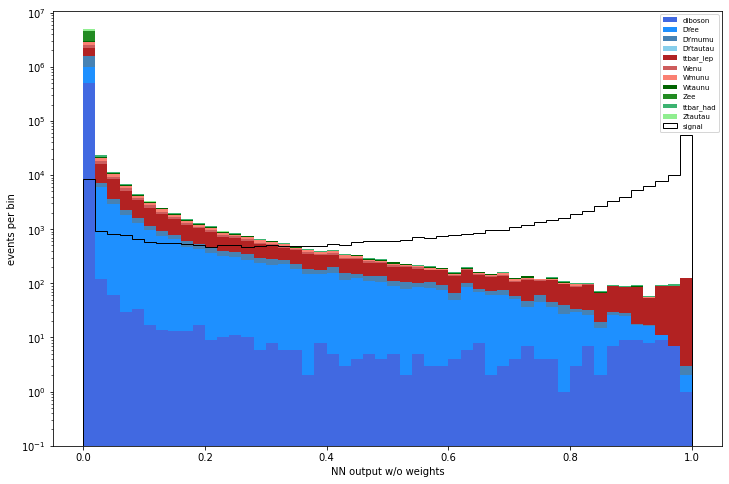

In [61]:
# Plotting the data without wieghts
plt.clf()
plt.figure(figsize=(12,8))

colors = ['royalblue', 'dodgerblue', 'steelblue', 'skyblue', 'firebrick', 'indianred', 'salmon', 'darkgreen', 'forestgreen', 'mediumseagreen', 'lightgreen']

histBins=np.histogram(np.hstack([*background_predict[0],*signal_predict]), bins=50)[1]
plt.hist( background_predict, bins=histBins[:], color=colors, stacked=True, label=backgroundLabel )
plt.hist( signal_predict, bins=histBins[:], color='black', histtype=u'step', label='signal')

plt.legend(loc='best', prop={'size': 7})
plt.xlabel('NN output w/o weights')
plt.ylabel('events per bin')
plt.yscale('log')
plt.ylim(bottom=1e-1  )
plt.show()

In [62]:
def get_weights(df, skip_mc_weight = False):
  if (not skip_mc_weight):
    return (np.array(df[eventWeights[0]] * df[eventWeights[1]] *df[eventWeights[2]] *df[eventWeights[3]] *df[eventWeights[4]] *df[eventWeights[5]] *df[eventWeights[6]] *df[eventWeights[7]]))
  else:
    return (np.array(df[eventWeights[1]] *df[eventWeights[2]] *df[eventWeights[3]] *df[eventWeights[4]] *df[eventWeights[5]] *df[eventWeights[6]] *df[eventWeights[7]]))


In [63]:
def get_background_weights(background):
  b_weights = []
  for i in range(0,len(background)):
    if (i == 8 or i == 10):
      b_weights.append(np.array(get_weights(background[i], skip_mc_weight=True)))
    else:
      b_weights.append(np.array(get_weights(background[i])))
  return b_weights

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

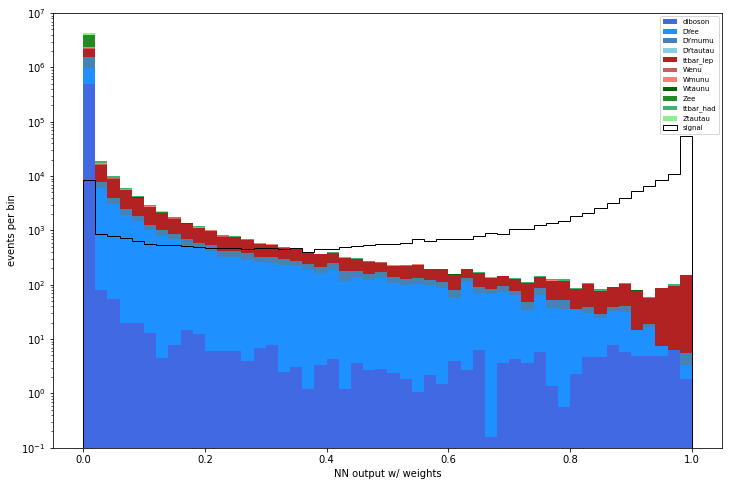

In [64]:
#Plotting the data with weights
plt.clf()
plt.figure(figsize=(12,8))

s_weights = np.array(signal_test[eventWeights[0]] * 
                     signal_test[eventWeights[1]] *
                     signal_test[eventWeights[2]] *
                     signal_test[eventWeights[3]] *
                     signal_test[eventWeights[4]] *
                     signal_test[eventWeights[5]] *
                     signal_test[eventWeights[6]] *
                     signal_test[eventWeights[7]])

Zee_sampling_weight = 2

b_weights = get_background_weights(background_test)



colors = ['royalblue', 'dodgerblue', 'steelblue', 'skyblue', 'firebrick', 'indianred', 'salmon', 'darkgreen', 'forestgreen', 'mediumseagreen', 'lightgreen']

histBins=np.histogram(np.hstack([*background_predict[0],*signal_predict]), bins=50)[1]
plt.hist( background_predict, weights=b_weights, bins=histBins[:], color=colors, stacked=True, label=backgroundLabel )
## len(signal_predict) != len(s_weights) ???
plt.hist( signal_predict, weights=s_weights, bins=histBins[:], color='black', histtype=u'step', label='signal')

plt.legend(loc='best', prop={'size': 7})
plt.xlabel('NN output w/ weights')
plt.ylabel('events per bin')
plt.yscale('log')
plt.ylim(bottom=1e-1  )
plt.show()

## Invariant mass


In [66]:
[df_test[col].update((df_test[col] - df_test[col].min()) / (df_test[col].max() - df_test[col].min())) for col in df_test[features].columns]
print("")

In [67]:
dl = learn.dls.test_dl(df_test[features])
test_set_predictions = learn.get_preds(dl=dl)[0].numpy()

In [68]:
df_test['predictions'] = test_set_predictions

In [69]:
signal_predicted_mean = signal_predict.mean()
predicted_signal_df = df_test.loc[df_test['predictions'] >= signal_predicted_mean]
predicted_signal_df= predicted_signal_df.copy()

In [70]:
df_test

,met_et,lep_1_E,lep_2_E,lep_3_E,lep_1_eta,lep_2_eta,jet_n,lep_1_pt,lep_2_pt,lep_3_pt,lep_4_pt,lep_5_pt,lep_1_phi,lep_2_phi,jet_2_trueflav,jet_1_E,jet_3_E,jet_1_pt,jet_2_pt,jet_3_pt,jet_4_pt,jet_5_pt,jet_6_pt,jet_7_pt,jet_8_pt,jet_9_pt,alljet_n,lep_1_etcone20,jet_2_MV1,jet_1_MV1,jet_1_phi,jet_1_m,jet_2_E,jet_2_jvf,jet_1_SV0,data_type,predictions
404481,0.000458,0.000809,0.002392,0.022551,0.515974,0.665872,0.142857,0.000870,0.001347,0.069840,0.053886,0.385410,0.303417,0.024898,0.000000,0.092998,0.015901,0.030906,0.000770,0.037050,0.085010,0.069641,0.121949,0.150947,0.172448,0.220108,0.142857,0.034339,0.000011,1.000000,0.808106,0.025170,0.054101,0.500000,0.260533,0,1.280513e-08
468203,0.001916,0.000457,0.022686,0.024484,0.273723,0.317182,0.214286,0.000034,0.024039,0.019261,0.045444,0.000000,0.563372,0.649313,0.266667,0.007314,0.018907,0.011509,0.001155,0.038420,0.058011,0.068542,0.126738,0.137269,0.275808,0.236550,0.214286,0.033515,0.004955,0.006234,0.369023,0.027399,0.005783,0.953041,0.141625,0,0.000000e+00
108207,0.001053,0.000487,0.024356,0.175148,0.375314,0.525402,0.071429,0.000336,0.039881,0.126384,0.206899,0.562313,0.527304,0.918125,0.266667,0.032464,0.016027,0.023432,0.052725,0.048847,0.083335,0.118609,0.156924,0.132312,0.211734,0.253377,0.071429,0.033697,0.965069,0.002751,0.083145,0.019367,0.047219,0.989665,0.141625,0,0.000000e+00
200505,0.001122,0.000441,0.042036,0.139847,0.376648,0.137087,0.142857,0.000298,0.017941,0.090181,0.042019,0.385410,0.380464,0.258186,0.333333,0.018164,0.071822,0.026044,0.006154,0.043749,0.078119,0.067657,0.117790,0.144053,0.192780,0.253377,0.142857,0.034258,0.973817,0.828299,0.802049,0.029910,0.003877,0.931359,0.141625,0,1.399649e-08
427705,0.001535,0.001117,0.015852,0.047168,0.398932,0.603313,0.071429,0.000998,0.022325,0.119269,0.040548,0.385410,0.652571,0.106889,0.000000,0.006222,0.011588,0.007975,0.014486,0.036328,0.061494,0.069914,0.116468,0.152414,0.172448,0.220108,0.142857,0.035452,0.027609,0.375707,0.347445,0.018859,0.033328,0.629111,0.141625,0,9.516794e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.002090,0.009754,0.017453,0.008390,0.831738,0.992725,0.357143,0.003454,0.000043,0.027857,0.104439,0.379024,0.539729,0.291643,0.333333,0.169356,0.049955,0.276297,0.133270,0.160955,0.181901,0.111929,0.144473,0.144634,0.176526,0.252481,0.357143,0.033340,0.425967,0.502701,0.112081,0.123192,0.163509,0.992562,0.141625,1,9.872019e-01
103694,0.010014,0.010165,0.023339,0.017282,0.471930,0.574940,0.214286,0.010880,0.035599,0.031109,0.036535,0.379024,0.633141,0.093794,0.333333,0.040990,0.031396,0.061990,0.066148,0.092152,0.091558,0.075997,0.244820,0.156282,0.196588,0.279622,0.214286,0.044411,0.999999,0.002997,0.136531,0.057869,0.038935,0.987749,0.141625,1,9.987220e-01
131932,0.001614,0.001299,0.151749,0.033881,0.626776,0.085274,0.142857,0.001054,0.057137,0.056904,0.051879,0.379024,0.267060,0.983934,0.333333,0.309808,0.038175,0.072740,0.047131,0.112829,0.140269,0.121790,0.150383,0.146327,0.172672,0.245184,0.142857,0.036065,0.999919,0.000020,0.830258,0.038463,0.146622,0.940308,0.141625,1,9.000643e-01
146867,0.009364,0.000657,0.054998,0.010878,0.330830,0.594059,0.285714,0.000346,0.081000,0.027492,0.061583,0.372974,0.164052,0.695896,0.333333,0.147191,0.140516,0.192846,0.206174,0.321309,0.115279,0.251344,0.161471,0.128670,0.269269,0.269354,0.285714,0.035047,0.995112,0.001889,0.747885,0.056156,0.199565,0.978793,0.141625,1,9.999036e-01


In [71]:
total_signal_rows_from_test_data =df_test[separatorTest[-1]:].shape[0]
total_predicted_rows = predicted_signal_df.shape[0]
print("Number of signal entries in the test data set: ", total_signal_rows_from_test_data)
print("Number of signal entries in the predicted set: ", total_predicted_rows)

Number of signal entries in the test data set:  135599
Number of signal entries in the predicted set:  103853


In [72]:
correct_predictions = predicted_signal_df['data_type'].value_counts()
print("Number of correctly predicted signal entries in the predicted set: ", predicted_signal_df['data_type'].value_counts()[1])

Number of correctly predicted signal entries in the predicted set:  102393


In [73]:
# Denormalize the data
[predicted_signal_df[col].update( predicted_signal_df[col] * (col_max_map[col] - col_min_map[col]) - col_min_map[col]) for col in predicted_signal_df[features].columns]
print("")

In [74]:
predicted_signal_df['invariant_mass'] = np.sqrt(2 * (predicted_signal_df['lep_1_pt'] * predicted_signal_df['lep_2_pt']) * (np.cosh(predicted_signal_df['lep_1_eta'] - predicted_signal_df['lep_2_eta']) - np.cos(predicted_signal_df['lep_1_phi'] - predicted_signal_df['lep_2_phi'])))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
predicted_signal_df['invariant_mass'].mean()

34105.5625

In [76]:
predicted_signal_df['invariant_mass'].max()

507780.6875

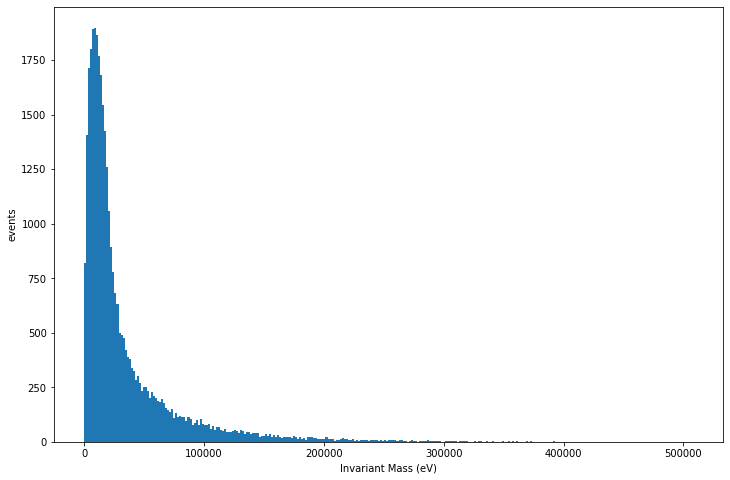

In [77]:
plt.figure(figsize=(12,8))
plt.xlabel('Invariant Mass (eV)')
plt.ylabel('events')
plt.hist(predicted_signal_df['invariant_mass'], bins=300)
print("")

## Feature importance

In [73]:
pip install fastinference[interp]

  Created wheel for shap: filename=shap-0.35.0-cp37-cp37m-linux_x86_64.whl size=395331 sha256=eed50c09d051f1070b5aa9da971c157a815cfaa15326e0a10f9bc8bf3b65979e
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
# pip install git+https://github.com/muellerzr/fastinference.git

In [74]:
from fastinference.tabular.shap.interp import *

In [ ]:
from fastinference.tabular.shap.interp import _get_values, _get_class_info

In [75]:
exp = ShapInterpretation(learn, df_test.iloc[:1000])

In [ ]:
# exp.explainer
# shap_values = _get_values(exp)

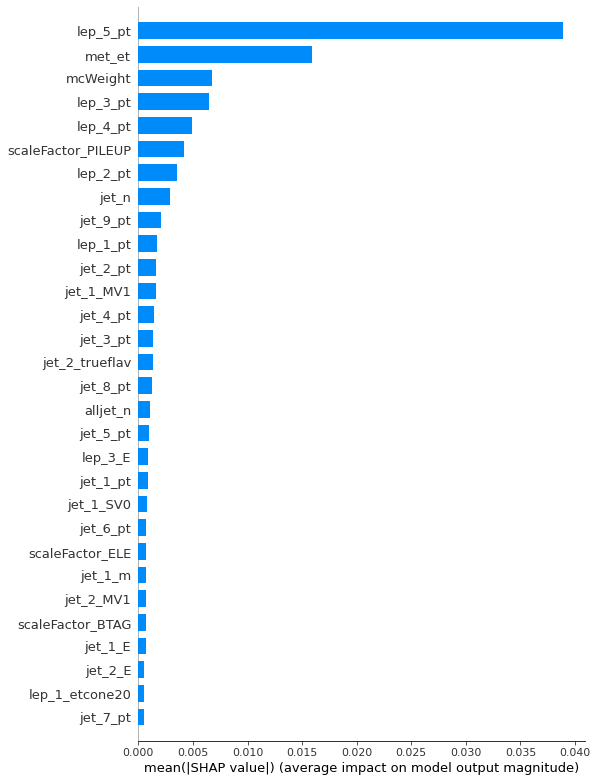

In [79]:
exp.summary_plot(plot_type="bar", max_display = 30)

# Random Forest


This part is no longer used, as it did not provide useful results.

In [55]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG
from sklearn.datasets import make_regression


In [56]:
m2 = RandomForestRegressor(n_jobs=-1, random_state=0, max_samples=200000)
m2.fit(df_train[features], df_train['data_type'])


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=200000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
preds = m2.predict(df_test[features])

In [58]:
max(preds)

1.0

In [60]:
# The main issue with the model was that it predicted a low amount of unique values
words = list(preds)
values, counts = np.unique(words, return_counts=True)
len(values)

101

In [65]:
xs,y = df_train[features], df_train['data_type']
valid_xs,valid_y = df_valid[features], df_valid['data_type']

In [ ]:
# Number of background data entries
test.count(0)

In [66]:
## low max_features ==> high == better predictions, high runtime
def rf(xs, y, n_estimators=50, max_samples=200000,
       max_features=33, min_samples_leaf=1, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [67]:
m2 = rf(xs, y)

In [ ]:
# preds = np.stack([t.predict(valid_xs) for t in m2.estimators_])
preds = m2.predict(valid_xs)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(valid_y, preds)

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m2, xs)

In [ ]:
fi

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)



In [ ]:
plot_fi(fi)

In [ ]:
# signal_predict_tree = m2.predict(df_test[features])

background_predict_rfs = [None]*len(background_test)
for i in range(len(background_test)):
  background_predict_rfs[i] = m2.predict((df_test[separatorTest[i]:separatorTest[i+1]][features]))

signal_predict_rfs = m2.predict(df_test[separatorTest[-1]:][features])
# signal_predict_rfs     = learn.predict( df_test[separatorTest[-1]:] )

for i in range(len(background_test)):
  print( 'Average', backgroundLabel[i], ':\t', background_predict_rfs[i].mean() )

print('-------')
print( 'Average background: ', np.fromiter(chain.from_iterable(background_predict_rfs),float).mean() )
print( 'Average signal:     ', signal_predict_rfs.mean() )

In [ ]:
plt.clf()

s_weights = signal_test['lumiweight']*signal_test['mcEventWeight']*signal_test['pileupweight']

b_weights   = [ np.array(background_test[0]['lumiweight']*background_test[0]['mcEventWeight']*background_test[0]['pileupweight']),
                np.array(background_test[1]['lumiweight']*background_test[1]['mcEventWeight']*background_test[1]['pileupweight']),
                np.array(background_test[2]['lumiweight']*background_test[2]['mcEventWeight']*background_test[2]['pileupweight']),
                np.array(background_test[3]['lumiweight']*background_test[3]['mcEventWeight']*background_test[3]['pileupweight']),
                np.array(background_test[4]['lumiweight']*background_test[4]['mcEventWeight']*background_test[4]['pileupweight']),
                np.array(background_test[5]['lumiweight']*background_test[5]['mcEventWeight']*background_test[5]['pileupweight']),
                np.array(background_test[6]['lumiweight']*background_test[6]['mcEventWeight']*background_test[6]['pileupweight']),
                np.array(background_test[7]['lumiweight']*background_test[7]['mcEventWeight']*background_test[7]['pileupweight']),
                np.array(background_test[8]['lumiweight']*background_test[8]['mcEventWeight']*background_test[8]['pileupweight']),
                np.array(background_test[9]['lumiweight']*background_test[9]['mcEventWeight']*background_test[9]['pileupweight']),
                np.array(background_test[10]['lumiweight']*background_test[10]['mcEventWeight']*background_test[10]['pileupweight'])
              ]


colors = ['royalblue', 'dodgerblue', 'steelblue', 'skyblue', 'firebrick', 'indianred', 'salmon', 'darkgreen', 'forestgreen', 'mediumseagreen', 'lightgreen']

histBins=np.histogram(np.hstack([*background_predict_rfs[0],*signal_predict_rfs]), bins=50)[1]
plt.hist( background_predict_rfs, weights=b_weights, bins=histBins[:], color=colors, stacked=True, label=backgroundLabel )
## len(signal_predict) != len(s_weights) ???
plt.hist( signal_predict_rfs , weights=s_weights[:1251], bins=histBins[:], color='black', histtype=u'step', label='signal')

plt.legend(loc='best', prop={'size': 7})
plt.xlabel('Random forest output')
plt.ylabel('events per bin')
plt.yscale('log')
plt.ylim(bottom=1e-1  )
plt.show()

In [ ]:
words = list(signal_predict_rfs)
values, counts = np.unique(words, return_counts=True)
len(values)

In [ ]:
len(signal_predict_rfs)

In [ ]:
list(signal_predict_rfs[0:50])

# Plotting data

This section has mainly been used to find some more information regarding  the data and its features. The functions below have been used to see if there are any different patterns in the way background and signal data behaves. The graphs show some of such examples.  

In [71]:
def plot_multiple(data_set, label_set):
  for i in range (0, len(data_set)):
    data = data_set[i]
    label = label_set[i]
    plt.hist(data, label=label)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(loc="upper left")
  plt.show()

def plot_single(label):
  data = signal[label]
  plt.hist(data, label=label, bins=50)
  plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  plt.legend(loc="upper left")
  plt.show()

def plot_signal_and_background(label):
  background_data = [item[label] for item in background]
  signal_data = signal[label].sample(n=22599, random_state=1)
  
  plt.rcParams['figure.figsize'] = [16, 9]
  plt.xlabel(label)
  plt.ylabel("Events per bin")
  plt.hist( background_data, bins = 100, stacked=True, label=backgroundLabel )
  plt.hist(signal_data, bins=100, color='black', histtype=u'step', label='signal')
  plt.legend(loc='best', prop={'size': 7})
  plt.yscale('log')
  plt.show()


def scatter(x_label, y_label, y_limit = None):
  axes = plt.gca()
  # axes.set_ylim([0,y_limit])
  signal_x_data, signal_y_data = signal[x_label].sample(n=22599, random_state=1), signal[y_label].sample(n=22599, random_state=1)
  background_x_data = [item[x_label] for item in background]
  background_y_data = [item[y_label] for item in background]

  plt.rcParams['figure.figsize'] = [16, 9]
  plt.rcParams["legend.markerscale"] = 2
  plt.xlabel(x_label)
  plt.ylabel(y_label)


  for i in range(0,len(background)):
    plt.scatter(background[i][x_label], background[i][y_label], s = 1, label = backgroundLabel[i])

  plt.scatter(signal_x_data, signal_y_data, color='black', s=0.07, label = 'signal')

  plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  plt.legend(loc='best', prop={'size': 10})
  plt.show()

def plot_subtract(label_1, label_2):
  
  background_data = [item[label_1] - item[label_2] for item in background]
  signal_data = signal[label_1] - signal[label_2]

  plt.rcParams['figure.figsize'] = [16, 9]
  plt.xlabel(label_1 + "-" + label_2)
  plt.ylabel("Events per bin")
  plt.hist( background_data, bins = 50, stacked=True, label=backgroundLabel )
  plt.hist(signal_data, bins=50, color='black', histtype=u'step', label='signal')
  plt.legend(loc='best', prop={'size': 12})
  # plt.yscale('log')
  plt.show()

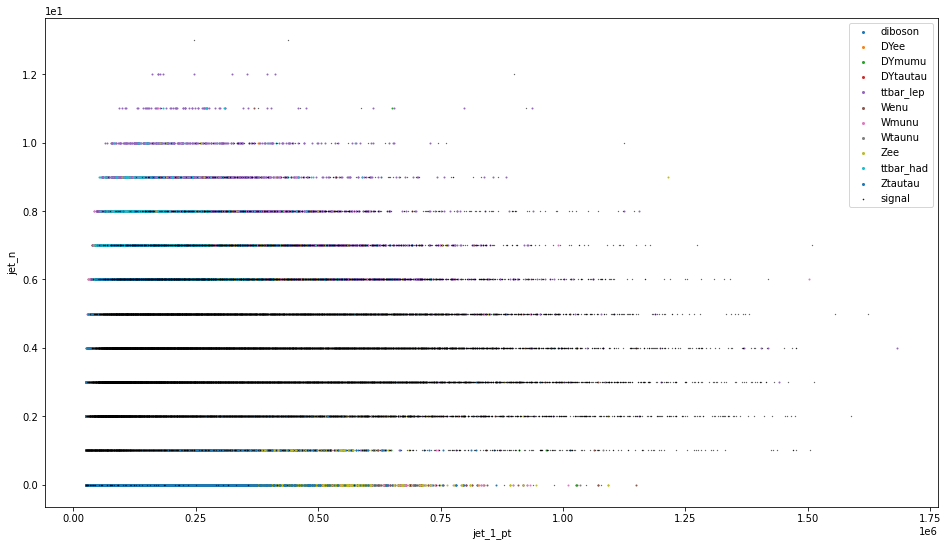

In [36]:
scatter("jet_1_pt", "jet_n")


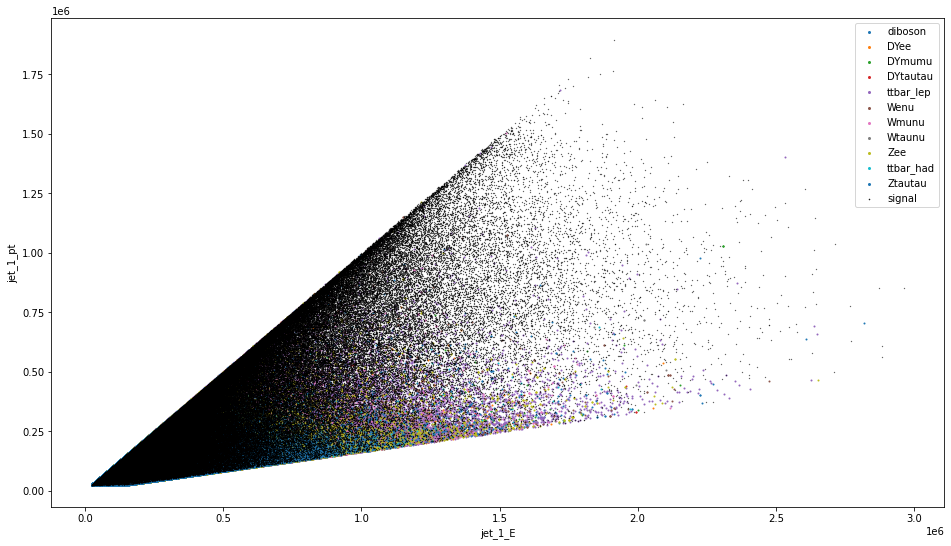

In [31]:

## Without reducing the data 
scatter("jet_1_E", "jet_1_pt")

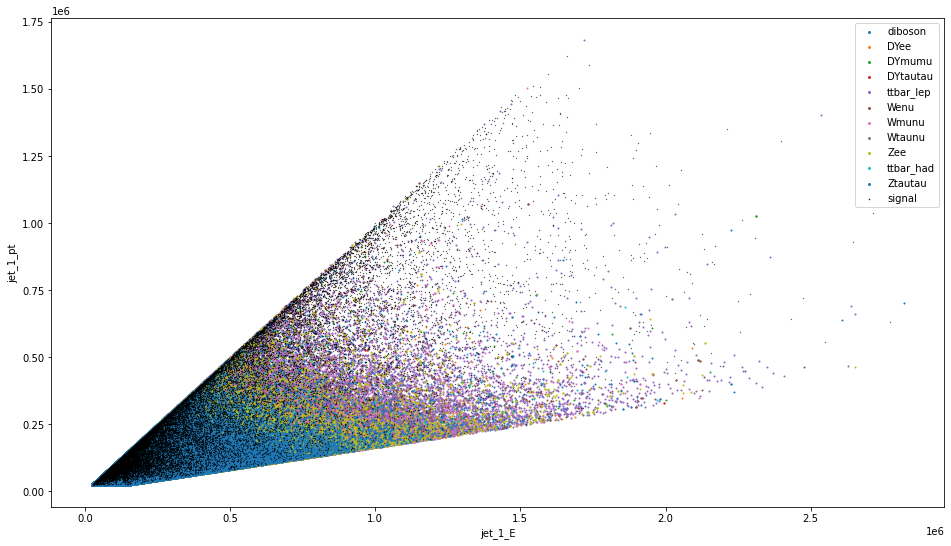

In [35]:
#With data reduction 
scatter("jet_1_E", "jet_1_pt")

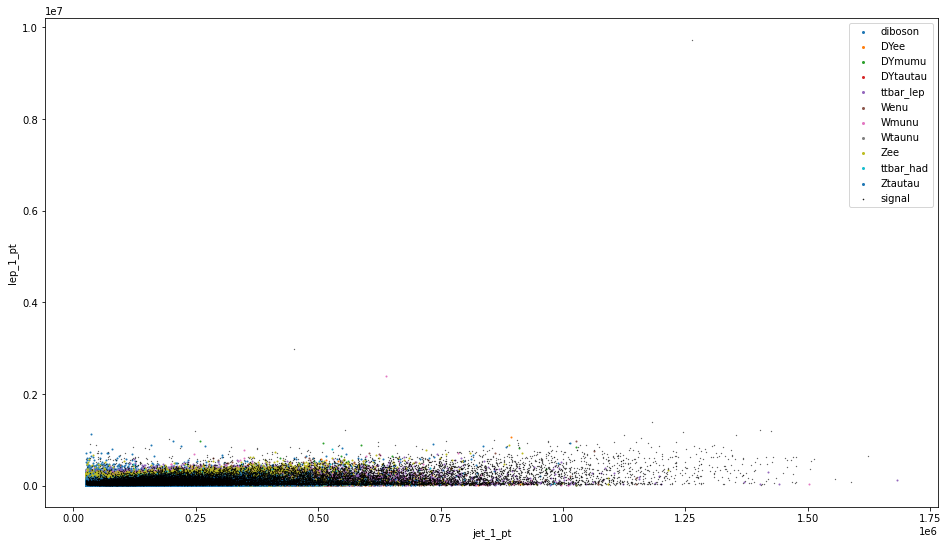

In [40]:
scatter("jet_1_pt", "lep_1_pt")

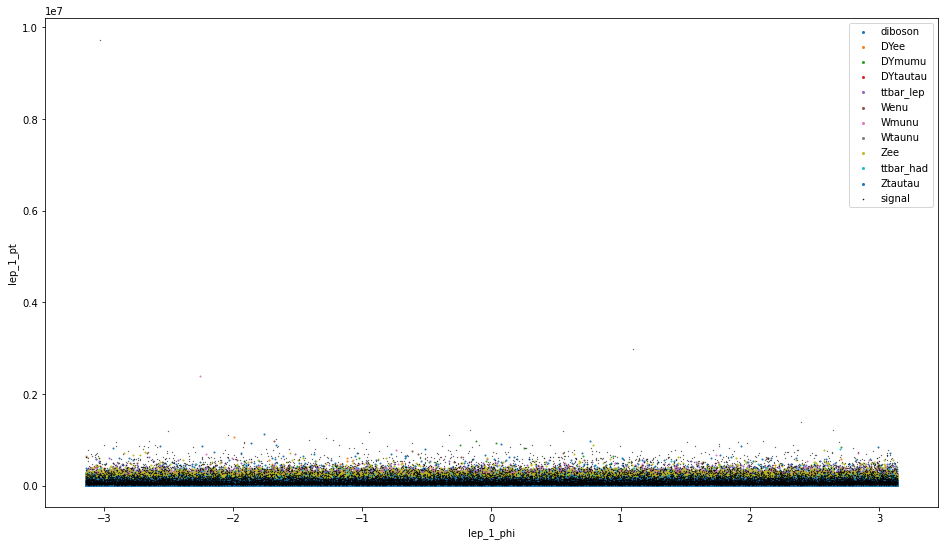

In [38]:
scatter("lep_1_phi", "lep_1_pt")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


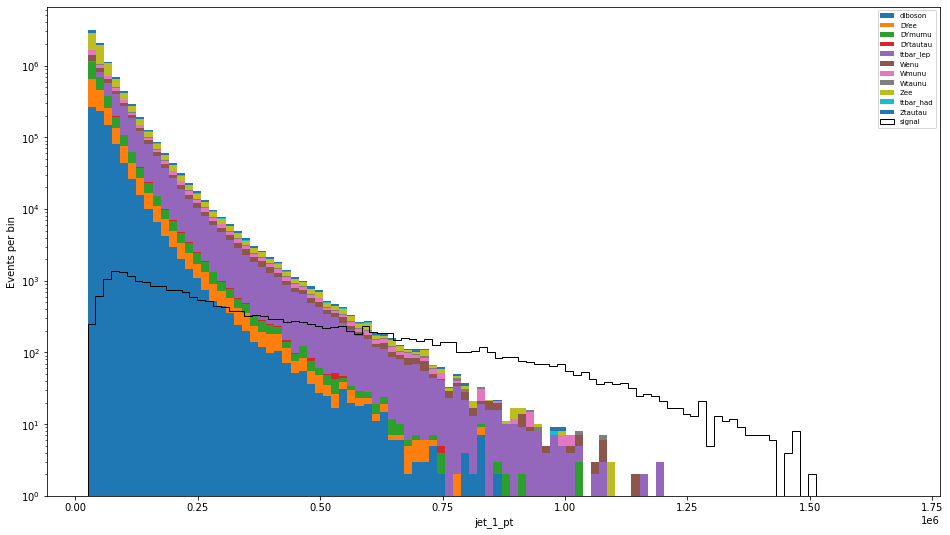

In [72]:
plot_signal_and_background("jet_1_pt")